In [1]:
# Name Zhen Cai
# ID 219056512

# Question 1: Find the distances of the farthest and nearest housing blocks from the house block described in the 1st row of the dataset.
import numpy as np
import pandas as pd
import csv
import math

df = pd.read_csv('housing_dataset.csv')

Q1 = df.loc[:, ['longitude', 'latitude']]

lon = Q1["longitude"]

lat = Q1["latitude"]

dist = np.empty(len(Q1))

for i in range(0, len(Q1)):
    dist[i] = math.sqrt( ((lon[i]-lon[0])**2)+((lat[i]-lat[0])**2) )

Q1.insert(2, "Distance", dist)

Q1_sort = Q1.sort_values('Distance', ascending = False)

print(Q1_sort)

print("The longtitude and latitude of the farthest house is:", Q1_sort.loc[0,'longitude'], Q1_sort.loc[0,'latitude'])
print("The longtitude and latitude of the nearest house is:", Q1_sort.loc[2780, 'longitude'], Q1_sort.loc[2780, 'latitude'])
print("The distance of the farthest house is:", Q1_sort.loc[0,'Distance'])
print("The distance of the nearest house is:", Q1_sort.loc[2780,'Distance'])

       longitude  latitude  Distance
2780     -114.55     32.80  9.208083
2781     -114.63     32.76  9.163755
2782     -114.66     32.74  9.150109
2779     -114.65     32.79  9.130416
12453    -114.57     33.52  8.813921
...          ...       ...       ...
418      -122.25     37.89  0.022361
421      -122.25     37.89  0.022361
422      -122.25     37.89  0.022361
1633     -122.22     37.88  0.010000
0        -122.23     37.88  0.000000

[20640 rows x 3 columns]
The longtitude and latitude of the farthest house is: -122.23 37.88
The longtitude and latitude of the nearest house is: -114.55 32.8
The distance of the farthest house is: 0.0
The distance of the nearest house is: 9.208083405356414


In [9]:
# Question 2. Calculate the average age of the house blocks near the ocean.

import pandas as pd

age = pd.read_csv('housing_dataset.csv')

age.groupby('ocean_proximity').housing_age.mean()

NearOcean = age[age.ocean_proximity=='NEAR OCEAN'].housing_age.mean()

print("The average age of the house blocks near the ocean is:",NearOcean)

The average age of the house blocks near the ocean is: 29.347253574115875


In [84]:
# Question 3. Find the income of the housing block with the most and least population density (per family).

import numpy as np
import csv
import pandas as pd

population = []
family = []
income = []

with open('housing_dataset.csv') as csvfile:
    Housing_Data = csv.reader(csvfile, delimiter = ',')
       
    next(Housing_Data)
    
    for row in Housing_Data:
        
        population.append([float(row[5])])
        family.append([float(row[6])])
        income.append([float(row[7])])
        
population = np.array(population)
family = np.array(family)
income = np.array(income)

pop_Density = np.empty(20640)

for a in range(0,20640):
    pop_Density[a] = population[a] / family[a]
    
print(pop_Density)

idx_pop_max = np.argmax(pop_Density)
idx_pop_min = np.argmin(pop_Density)

print("The income of the most population density:", income[idx_pop_max])
print("The income of the least population density:", income[idx_pop_min])


[2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]
The income of the most population density: [10.2264]
The income of the least population density: [2.5893]


In [99]:
# Question 4. Calculate the price difference between the latest and oldest housing block from the dataset.

import pandas as pd
import csv

df = pd.read_csv('housing_dataset.csv')

age = df["housing_age"]
price = df["house_value"]


max_idx = age.idxmax()
min_idx = age.idxmin()

print(max_idx)
print(min_idx)
print(price[max_idx])
print(price[min_idx])

difference = abs(price[max_idx] - price[min_idx])

print("The price difference between the latest and oldest house is:", difference)


0        41
1        21
2        52
3        52
4        52
         ..
20635    25
20636    18
20637    17
20638    18
20639    16
Name: housing_age, Length: 20640, dtype: int64
2
3130
352100
141700
The price difference between the latest and oldest house is: 210400


In [96]:
# Question 5. Calculate the cheapest price per room from the dataset.

import pandas as pd
import numpy as np
import csv

df1 = pd.read_csv('housing_dataset.csv')

rooms = df1["total_rooms"]
price = df1["house_value"]

price_room = np.empty(20640)

for a in range(0,20640):
    price_room[a] = price[a] / rooms[a]
    
Price_min = price_room.min()

print("The cheapest price per room is:", Price_min)

[514.31818182  50.50007043 240.01363327 ...  40.94942325  45.53763441
  32.1005386 ]
The cheapest price per room is: 1.595444807757357


In [4]:
# Question 6. Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

import pandas as pd
import numpy as np
import csv

df = pd.read_csv('housing_dataset.csv')

population = df["population"]
family = df["families"]
price = df["average_income"]

pop_Density = np.empty(20640)

for a in range(0,20640):
    pop_Density[a] = population[a] / family[a]
    
print(pop_Density)

max_price_idx = price.idxmax()
min_price_idx = price.idxmin()

print("The population density of the most wealthy house:", pop_Density[max_price_idx])
print("The population density of the least wealthy house:", pop_Density[min_price_idx])

[2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]
The population density of the most wealthy house: 2.7777777777777777
The population density of the least wealthy house: 2.5714285714285716


In [124]:
# Question 7. Calculate and print the total housing blocks located in the same place.

import pandas as pd

df = pd.read_csv('housing_dataset.csv')

group_by = df.groupby(['longitude','latitude']).size()

same_loc = pd.Series(group_by)
same_loc = same_loc[same_loc > 1]
print(same_loc)

print("The number of houses located in the same location is:", sum(same_loc))

longitude  latitude
-124.18    40.78       3
           40.79       2
-124.17    40.80       3
-124.16    40.78       3
           40.79       3
                      ..
-115.52    32.97       2
           32.98       2
-115.49    32.67       3
-115.37    32.81       2
           32.82       2
Length: 4353, dtype: int64
The number of houses located in the same location is: 12403


In [129]:
# Question 8. Calculate the price of expensive room grouped by ocean proximity.

import pandas as pd

df = pd.read_csv('housing_dataset.csv')

group_by_op = df.groupby('ocean_proximity').house_value.sum()
group_by_rm = df.groupby('ocean_proximity').total_rooms.sum()

print(group_by_op)
print(group_by_rm)

PricePerRoom = group_by_op/group_by_rm
    
print(PricePerRoom)

ocean_proximity
<1H OCEAN     2193410032
INLAND         817600123
ISLAND           1902200
NEAR BAY       593596194
NEAR OCEAN     662995512
Name: house_value, dtype: int64
ocean_proximity
<1H OCEAN     24012547
INLAND        17803933
ISLAND            7873
NEAR BAY       5710320
NEAR OCEAN     6867477
Name: total_rooms, dtype: int64
ocean_proximity
<1H OCEAN      91.344331
INLAND         45.922444
ISLAND        241.610568
NEAR BAY      103.951476
NEAR OCEAN     96.541352
dtype: float64


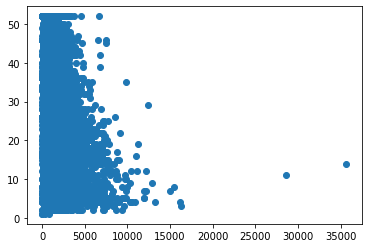

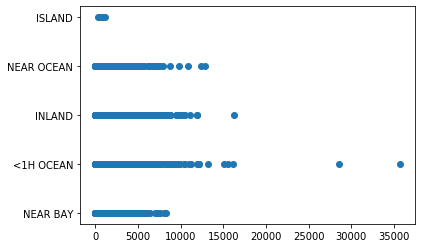

According to the scatter plot between population and age, most population's house age were aggerate under 10 years.
According to the scatter plot between population and ocean proximity, most population's ocean proximity were aggerate <1H OCEAN.


In [132]:
# P2 Question 1. Draw the population scatter plot against housing age and another against ocean proximity. From the graph, conclude an assumption.

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as mp

df = pd.read_csv('housing_dataset.csv')

population = df["population"]
age = df["housing_age"]
ocean = df["ocean_proximity"]

mp.scatter(population, age)

mp.show()

mp.scatter(population, ocean)

mp.show()

print("According to the scatter plot between population and age, most population's house age were aggerate under 10 years.")

print("According to the scatter plot between population and ocean proximity, most population's ocean proximity were aggerate <1H OCEAN.")





housing_age           28.639486
total_rooms         2635.763081
total_bedrooms       537.870553
population          1425.476744
families             499.539680
average_income         3.870671
house_value       206855.816909
dtype: float64
['longitude', 'latitude', 'housing_age', 'total_rooms', 'total_bedrooms', 'population', 'families', 'average_income', 'ocean_proximity', 'house_value']


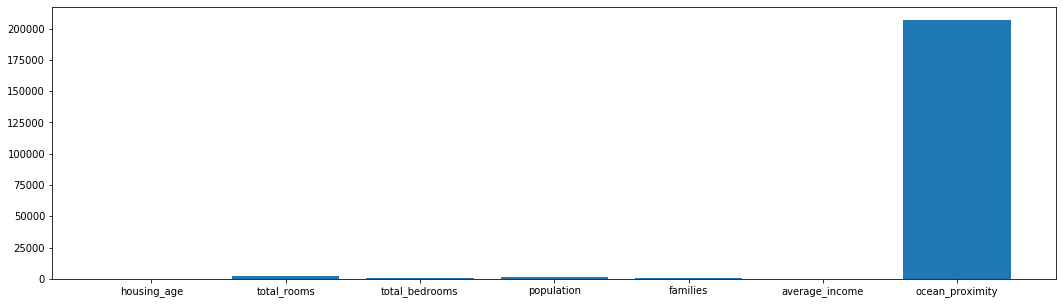

In [5]:
# P2 Question 2. Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as mp

df = pd.read_csv('housing_dataset.csv')

average_df = df.mean()
print(average_df[2:9])

attributes = list(df)
print(attributes)

f, ax = mp.subplots(figsize=(18,5))
mp.bar(attributes[2:9], average_df[2:9])
mp.show()

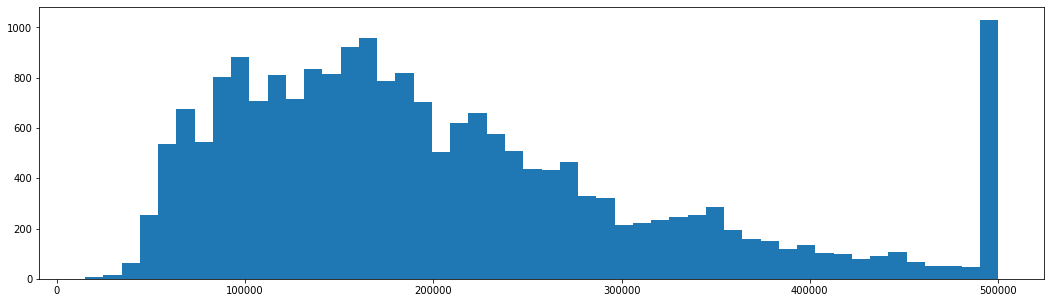

The average house price is : 206855.81690891474
Most house price aggreate at the left side of the histogram which indicates that most house price is less than the average price
However there is one column with alot of data on the right with might be potential outlier


In [4]:
# P2 Question 3. Visualize the differences in housing prices from the average price of housing using a bar diagram.

import pandas as pd
import matplotlib.pyplot as mp

df = pd.read_csv('housing_dataset.csv')

House_price = df["house_value"]

f, ax = mp.subplots(figsize=(18,5))
mp.hist(House_price, 50)
mp.show()
print("The average house price is :", House_price.mean())
print("Most house price aggreate at the left side of the histogram which indicates that most house price is less than the average price")
print("However there is one column with alot of data on the right with might be potential outlier")

In [29]:
# Part 3 Question 1. Save the details of all housing blocks in a csv le having houses near oceans and lower than the average of the housing value.

import pandas as pd

df = pd.read_csv('housing_dataset.csv')
house_value = df["house_value"]

df_new = df.loc[((df['ocean_proximity'] == "NEAR OCEAN") & (df['house_value'] < house_value.mean()))] 

print(df_new)

df_new.to_csv('A0P3Q1_219056512.csv')


       longitude  latitude  housing_age  total_rooms  total_bedrooms  \
1850     -124.17     41.80           16         2739           480.0   
1851     -124.30     41.80           19         2672           552.0   
1852     -124.23     41.75           11         3159           616.0   
1853     -124.21     41.77           17         3461           722.0   
1854     -124.19     41.78           15         3140           714.0   
...          ...       ...          ...          ...             ...   
20320    -119.15     34.25           36         3511           664.0   
20323    -119.12     34.23           35         2028           554.0   
20324    -119.12     34.25           31          737           146.0   
20349    -119.08     34.17           32          166            22.0   
20352    -119.09     34.22            8           40            10.0   

       population  families  average_income ocean_proximity  house_value  
1850         1259       436          3.7557      NEAR OCEAN 

In [30]:
# Part 3 Question 2. Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.

import pandas as pd

df = pd.read_csv('housing_dataset.csv')

df_new2 = df[['longitude', 'latitude', 'total_rooms', 'house_value']]

print(df_new2)

df_new2.to_csv('A0P3Q2_219056512.csv')

       longitude  latitude  total_rooms  house_value
0        -122.23     37.88          880       452600
1        -122.22     37.86         7099       358500
2        -122.24     37.85         1467       352100
3        -122.25     37.85         1274       341300
4        -122.25     37.85         1627       342200
...          ...       ...          ...          ...
20635    -121.09     39.48         1665        78100
20636    -121.21     39.49          697        77100
20637    -121.22     39.43         2254        92300
20638    -121.32     39.43         1860        84700
20639    -121.24     39.37         2785        89400

[20640 rows x 4 columns]
